In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam

from sklearn import linear_model
from statsmodels.stats.diagnostic import het_white

from statsmodels.tsa.stattools import adfuller
from numpy import log
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

import tensorflow as tf
import random

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.model_selection import GridSearchCV

# Section IV Data and Descriptive Statistics

In [2]:
carbon_price_url = 'https://raw.githubusercontent.com/Erica-zya/Honor-Thesis/main/Data/Data_New/Daily%20Carbon%20Price.csv'
carbon_price = pd.read_csv(carbon_price_url, header=0)
carbon_price['Date'] = pd.to_datetime(carbon_price['Date'])

energy_price_url = 'https://raw.githubusercontent.com/Erica-zya/Honor-Thesis/main/Data/Data_New/Daily%20Energy.csv'
energy_price = pd.read_csv(energy_price_url, header=0)
energy_price['Date'] = pd.to_datetime(energy_price['Date'])

policy_url = 'https://raw.githubusercontent.com/Erica-zya/Honor-Thesis/main/Data/Data_New/Daily%20Policy.csv'
policy = pd.read_csv(policy_url, header=0)
policy['Date'] = pd.to_datetime(policy['Date'])

market_url = 'https://raw.githubusercontent.com/Erica-zya/Honor-Thesis/main/Data/Data_New/Daily%20Market.csv'
market = pd.read_csv(market_url, header=0)
market['Date'] = pd.to_datetime(market['Date'])

weather_url = 'https://raw.githubusercontent.com/Erica-zya/Honor-Thesis/main/Data/Data_New/Daily%20Weather.csv'
weather = pd.read_csv(weather_url, header=0)
weather['Date'] = pd.to_datetime(weather['Date'])

# Perform the merges
df = pd.merge(carbon_price, energy_price, on='Date', how='inner')
df = pd.merge(df, policy, on='Date', how='inner')
df = pd.merge(df, market, on='Date', how='inner')
df = pd.merge(df, weather, on='Date', how='inner')
df = df.dropna()

In [3]:
df = df.sort_values(by=['Date'])

In [4]:
df.head()

,Date,Carbon,Coal,Crude Oil,Natural Gas,Fit_for_55,Law,Compromise,EPU,DAX,SPGTCLNT,FTMIB,CAC40,AEX,STOXX,Temperature,Precipitation,Solar Energy,Wind Speed
1122,2021-01-04,33.89,69.30,51.09,19.845,0,0,0,231.37864,13726.74,2342.44,22315.87,5588.96,631.03,401.69,2.8,0.170,0.8,9.6
1121,2021-01-05,33.15,64.90,53.60,18.005,0,0,0,231.37864,13651.22,2390.04,22200.60,5564.60,633.62,400.94,2.7,0.012,0.6,9.4
1120,2021-01-06,33.83,64.25,54.30,17.565,0,0,0,231.37864,13891.97,2518.59,22734.32,5630.60,639.16,406.41,3.2,0.047,0.6,8.2
1119,2021-01-07,34.97,66.60,54.38,19.305,0,0,0,231.37864,13968.24,2692.75,22746.08,5669.85,637.41,408.49,2.8,0.125,1.6,7.1
1118,2021-01-08,35.14,68.50,55.99,20.120,0,0,0,231.37864,14049.53,2720.79,22793.94,5706.88,645.60,411.17,2.2,0.082,2.2,5.6


In [5]:
df['Carbon'].count()

763

In the analysis of carbon pricing trends within the European Union's Emissions Trading System (EU ETS), this study draws upon a meticulously compiled dataset encompassing the period from January 1, 2021, to January 31, 2024. During this time frame, a total of 763 data points were collected, providing a granular view of carbon price movements. The carbon price data, sourced from Investing.com, is critical for understanding the economic implications of regulatory shifts and market dynamics under the EU's climate policy framework.

This timeframe is deliberately aligned with the initiation of Phase 4 of the European Union's Emissions Trading System (EU ETS), marking a significant transition from the system's previous phases. The focus on this specific period is due to the substantial regulatory shifts introduced in Phase 4, which differ markedly from the earlier phases in terms of emissions reduction targets and allowance allocation mechanisms.

Notably, in Phase 3 of the EU ETS (2013-2020), the Union-wide cap for stationary installations was subject to an annual decrease by a linear reduction factor of 1.74%, with the 2013 cap determined based on the average total quantity of allowances issued annually during 2008-2012. Conversely, Phase 4 (2021-2030) introduces a more aggressive approach to emissions reduction, with the cap on emissions decreasing annually at an increased linear reduction factor of 2.2%. This heightened ambition reflects the EU's commitment to achieving more substantial emissions reductions and necessitates an in-depth analysis of carbon pricing trends under the new regulatory framework. The study aims to isolate the impacts of these changes on carbon pricing, underscoring the importance of understanding the dynamics introduced by Phase 4's enhanced regulatory measures.

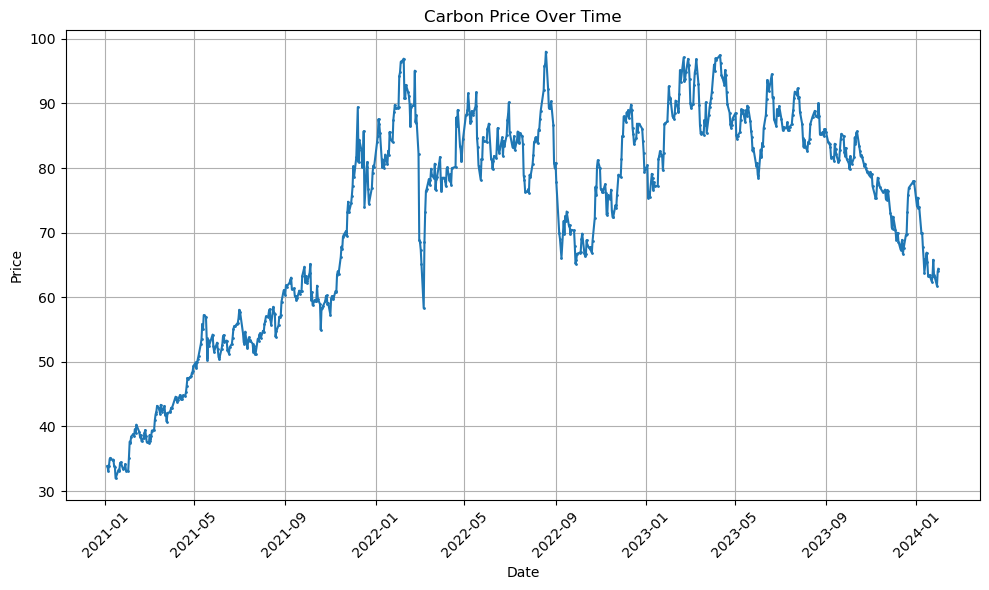

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Carbon'], marker='o', markersize=1, linestyle='-')
plt.title('Carbon Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
for column_name in df.columns[1:]:
    column = df[column_name]
    mean = column.mean()
    variance = column.var()
    sd = column.std()
    max_value = column.max()
    min_value = column.min()
    
    print(column_name)
    print("Mean:", mean)
    print("Variance:", variance)
    print("Standard Deviation:", sd)
    print("Maximum:", max_value)
    print("Minimum:", min_value)
    print()

Carbon
Mean: 72.98309305373526
Variance: 270.6564305779435
Standard Deviation: 16.45163914562751
Maximum: 98.01
Minimum: 31.96

Coal
Mean: 176.4729357798164
Variance: 8734.749716041804
Standard Deviation: 93.459882923326
Maximum: 439.0
Minimum: 63.75

Crude Oil
Mean: 83.81741808650057
Variance: 203.24808426985655
Standard Deviation: 14.256510241635452
Maximum: 127.98
Minimum: 51.09

Natural Gas
Mean: 72.44877326343381
Variance: 2982.6553067792283
Standard Deviation: 54.61369156886603
Maximum: 339.195
Minimum: 15.525

Fit_for_55
Mean: 0.8296199213630406
Variance: 0.14153620705668177
Standard Deviation: 0.376212980978437
Maximum: 1
Minimum: 0

Law
Mean: 0.21756225425950196
Variance: 0.1704523173135469
Standard Deviation: 0.4128587135008136
Maximum: 1
Minimum: 0

Compromise
Mean: 0.24508519003931847
Variance: 0.18526124601397334
Standard Deviation: 0.43041984853625576
Maximum: 1
Minimum: 0

EPU
Mean: 276.8771762858453
Variance: 4871.8912743413875
Standard Deviation: 69.79893462182204
Maxi

The descriptive statistics of our dataset from January 2021 to January 2024 reveal the carbon price's behavior during the EU ETS Phase 4, with a mean value of €72.98 and standard deviation indicating market volatility. The time series plot underscores these price fluctuations over the 763 observations. Complementing this, we observed varied patterns in related energy commodities and European stock indices, alongside weather variables that could influence emission levels and carbon market dynamics, all of which will be explored further in our econometric analysis.

### Test for Multicollinearity

In [8]:
# Drop the 'Date' and 'Carbon' columns before calculating VIF
df_numeric = df.drop(columns=['Date', 'Carbon'])

# Initialize a DataFrame to store VIF results
vif_data = pd.DataFrame()
vif_data["Feature"] = df_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(df_numeric.values, i) for i in range(df_numeric.shape[1])]

print(vif_data)

          Feature           VIF
0            Coal     74.107461
1       Crude Oil    278.930559
2     Natural Gas     24.272691
3      Fit_for_55     38.194815
4             Law     15.447276
5      Compromise     12.519092
6             EPU     65.929011
7             DAX  12001.686917
8        SPGTCLNT    132.011553
9           FTMIB   5479.306812
10          CAC40   2743.642110
11            AEX   5818.402102
12          STOXX  12428.629219
13    Temperature     14.243452
14  Precipitation      1.304320
15   Solar Energy      7.960605
16     Wind Speed     10.874388


In [9]:
# Check correlations between stock indices
stock_columns = ['DAX', 'SPGTCLNT', 'FTMIB', 'CAC40', 'AEX', 'STOXX']
print(df_numeric[stock_columns].corr())

               DAX  SPGTCLNT     FTMIB     CAC40       AEX     STOXX
DAX       1.000000 -0.283918  0.912680  0.804923  0.854027  0.881508
SPGTCLNT -0.283918  1.000000 -0.548251 -0.620263 -0.263157 -0.262386
FTMIB     0.912680 -0.548251  1.000000  0.908032  0.811391  0.818125
CAC40     0.804923 -0.620263  0.908032  1.000000  0.818160  0.824418
AEX       0.854027 -0.263157  0.811391  0.818160  1.000000  0.951225
STOXX     0.881508 -0.262386  0.818125  0.824418  0.951225  1.000000


In [10]:
# Check correlations between energy prices
energy_columns = ['Coal', 'Crude Oil', 'Natural Gas']
print(df_numeric[energy_columns].corr())

                 Coal  Crude Oil  Natural Gas
Coal         1.000000   0.823675     0.865181
Crude Oil    0.823675   1.000000     0.606318
Natural Gas  0.865181   0.606318     1.000000


### PCA

In [11]:
# Step 1: Combine Stock Indices using PCA
cols_to_pca_stock = ['DAX', 'STOXX', 'FTMIB', 'CAC40', 'AEX','SPGTCLNT']

# Standardize the stock index data
scaler = StandardScaler()
X_pca_stock = scaler.fit_transform(df[cols_to_pca_stock])

# Apply PCA for stock indices
pca_stock = PCA(n_components=1)
X_pca_stock_reduced = pca_stock.fit_transform(X_pca_stock)

# Step 2 (Optional): Combine Energy Prices using PCA
cols_to_pca_energy = ['Crude Oil', 'Coal', 'Natural Gas']

# Standardize the energy price data
X_pca_energy = scaler.fit_transform(df[cols_to_pca_energy])

# Apply PCA for energy prices
pca_energy = PCA(n_components=1)
X_pca_energy_reduced = pca_energy.fit_transform(X_pca_energy)

# Step 3: Create df_arima without modifying df
# Select all other columns except the original stock indices and energy prices
other_columns = [col for col in df.columns if col not in cols_to_pca_stock + cols_to_pca_energy]

# Create the new DataFrame with the PCA components and other columns
df_arima = df[other_columns].copy()  # Copy the rest of the columns
df_arima['PCA_Stock_Index'] = X_pca_stock_reduced
df_arima['PCA_Energy_Prices'] = X_pca_energy_reduced

In [12]:
# Drop the 'Date' and 'Carbon' columns before calculating VIF
df_numeric_new = df_arima.drop(columns=['Date', 'Carbon','Law','Compromise','Fit_for_55'])

# Initialize a DataFrame to store VIF results
vif_data_new = pd.DataFrame()
vif_data_new["Feature"] = df_numeric_new.columns
vif_data_new["VIF"] = [variance_inflation_factor(df_numeric_new.values, i) for i in range(df_numeric_new.shape[1])]

print(vif_data_new)

             Feature        VIF
0                EPU  11.711455
1        Temperature   8.886121
2      Precipitation   1.258885
3       Solar Energy   4.239777
4         Wind Speed   9.320415
5    PCA_Stock_Index   1.227304
6  PCA_Energy_Prices   1.775570


# Section V Forcasting of Carbon Price

## ARIMA Model

##### AR(1)

In [13]:
y = df_arima['Carbon']

modelAR1 = AutoReg(y, lags=1)
resultAR1 = modelAR1.fit()

print(resultAR1.summary())

                            AutoReg Model Results                             
Dep. Variable:                 Carbon   No. Observations:                  763
Model:                     AutoReg(1)   Log Likelihood               -1631.975
Method:               Conditional MLE   S.D. of innovations              2.060
Date:                Tue, 15 Oct 2024   AIC                           3269.951
Time:                        16:52:44   BIC                           3283.859
Sample:                             1   HQIC                          3275.306
                                  763                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8752      0.339      2.578      0.010       0.210       1.541
Carbon.L1      0.9886      0.005    217.881      0.000       0.980       0.997
                                    Roots           

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [14]:
adf_result = adfuller(y)

print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.496120
p-value: 0.116421
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


In [15]:
y_diff = y.diff().dropna()


modelAR1_diff = AutoReg(y_diff, lags=1)
resultAR1_diff = modelAR1_diff.fit()

print(resultAR1_diff.summary())

                            AutoReg Model Results                             
Dep. Variable:                 Carbon   No. Observations:                  762
Model:                     AutoReg(1)   Log Likelihood               -1632.661
Method:               Conditional MLE   S.D. of innovations              2.068
Date:                Tue, 15 Oct 2024   AIC                           3271.322
Time:                        16:52:44   BIC                           3285.226
Sample:                             1   HQIC                          3276.676
                                  762                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0428      0.075      0.571      0.568      -0.104       0.190
Carbon.L1     -0.0448      0.036     -1.236      0.216      -0.116       0.026
                                    Roots           

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


##### AR(2)

In [16]:
modelAR2 = AutoReg(y, lags=2)
resultAR2 = modelAR2.fit()

print(resultAR2.summary())

                            AutoReg Model Results                             
Dep. Variable:                 Carbon   No. Observations:                  763
Model:                     AutoReg(2)   Log Likelihood               -1629.492
Method:               Conditional MLE   S.D. of innovations              2.059
Date:                Tue, 15 Oct 2024   AIC                           3266.983
Time:                        16:52:44   BIC                           3285.522
Sample:                             2   HQIC                          3274.122
                                  763                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8821      0.341      2.587      0.010       0.214       1.550
Carbon.L1      0.9469      0.036     26.151      0.000       0.876       1.018
Carbon.L2      0.0416      0.036      1.152      0.2

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [17]:
residuals = resultAR2.resid

if np.isnan(residuals).any() or np.isinf(residuals).any():
    residuals = residuals[~(np.isnan(residuals) | np.isinf(residuals))]

adf_test = adfuller(residuals)

print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])
print('Critical Values:')
for key, value in adf_test[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -12.798021
p-value: 0.000000
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


In [18]:
X = df_arima.drop(columns=['Date','Carbon'])
_y = df_arima['Carbon']

<Figure size 1000x600 with 0 Axes>

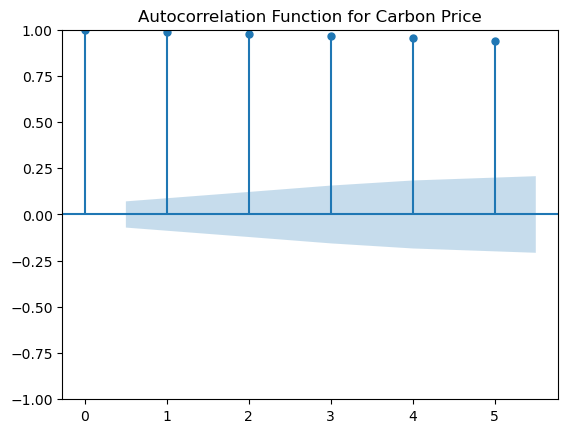

In [19]:
plt.figure(figsize=(10, 6))
plot_acf(df_arima['Carbon'], lags=5, alpha=0.05)
plt.title('Autocorrelation Function for Carbon Price')
plt.show()

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

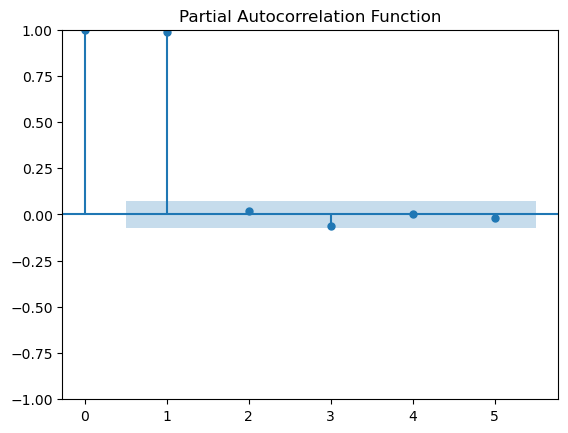

In [20]:
plt.figure(figsize=(10, 6))
plot_pacf(_y, lags=5, alpha=0.05)
plt.title('Partial Autocorrelation Function')
plt.show()

##### ARIMA(1,0,0)

In [21]:
model_arima100 = ARIMA(_y, exog=X, order=(1,0,0))
model_arima100_fit = model_arima100.fit()

print(model_arima100_fit.summary())

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Carbon   No. Observations:                  763
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1605.501
Date:                Tue, 15 Oct 2024   AIC                           3237.002
Time:                        16:52:46   BIC                           3297.286
Sample:                             0   HQIC                          3260.212
                                - 763                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                51.5417    111.246      0.463      0.643    -166.497     269.581
Fit_for_55            1.7956      3.365      0.534      0.594      -4.800       8.391
Law                  -1.

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


##### ARIMA(1,0,1)

In [22]:
model_arima101 = ARIMA(_y, exog=X, order=(1,0,1))
model_arima101_fit = model_arima101.fit()

print(model_arima101_fit.summary())

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Carbon   No. Observations:                  763
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1602.825
Date:                Tue, 15 Oct 2024   AIC                           3233.649
Time:                        16:52:48   BIC                           3298.571
Sample:                             0   HQIC                          3258.645
                                - 763                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                51.5986    105.568      0.489      0.625    -155.311     258.508
Fit_for_55            2.0090      2.963      0.678      0.498      -3.799       7.817
Law                  -1.

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


##### ARIMA(1,1,0)

In [23]:
model_arima110 = ARIMA(_y, exog=X, order=(1,1,0))
model_arima110_fit = model_arima110.fit()

print(model_arima110_fit.summary())

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Carbon   No. Observations:                  763
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1597.397
Date:                Tue, 15 Oct 2024   AIC                           3218.794
Time:                        16:52:48   BIC                           3274.425
Sample:                             0   HQIC                          3240.214
                                - 763                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Fit_for_55            0.5834     48.254      0.012      0.990     -93.993      95.160
Law                  -2.9904     40.910     -0.073      0.942     -83.173      77.193
Compromise            2.

##### ARIMA(1,1,1); Best Performing Model

In [24]:
model_arima111 = ARIMA(_y, exog=X, order=(1,1,1))
model_arima111_fit = model_arima111.fit()

print(model_arima111_fit.summary())

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Carbon   No. Observations:                  763
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1594.943
Date:                Tue, 15 Oct 2024   AIC                           3215.887
Time:                        16:52:50   BIC                           3276.154
Sample:                             0   HQIC                          3239.092
                                - 763                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Fit_for_55            0.6279     20.803      0.030      0.976     -40.145      41.401
Law                  -3.0274     10.469     -0.289      0.772     -23.547      17.492
Compromise            2.

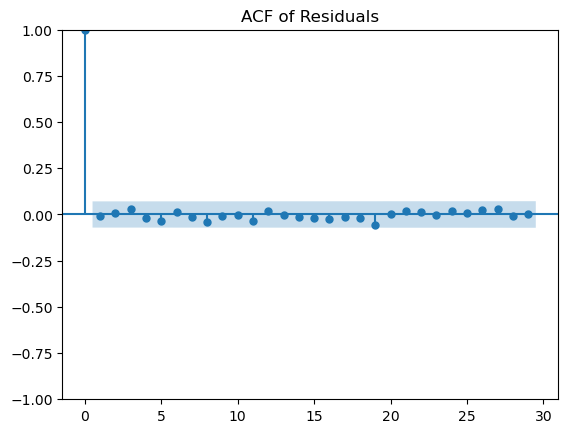

In [25]:
model_fit = model_arima111.fit()

# Get the residuals
residuals = model_fit.resid

# Plot the ACF of residuals
plot_acf(residuals, alpha=0.05)
plt.title('ACF of Residuals')
plt.show()

##### ARIMA(2,0,0)

In [26]:
model_arima200 = ARIMA(_y, exog=X, order=(2,0,0))
model_arima200_fit = model_arima200.fit()

print(model_arima200_fit.summary())

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Carbon   No. Observations:                  763
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1602.221
Date:                Tue, 15 Oct 2024   AIC                           3232.443
Time:                        16:52:53   BIC                           3297.364
Sample:                             0   HQIC                          3257.438
                                - 763                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                51.1642    104.307      0.491      0.624    -153.273     255.602
Fit_for_55            1.7548      3.719      0.472      0.637      -5.534       9.043
Law                  -1.

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


##### ARIMA(2,1,0)

In [27]:
model_arima210 = ARIMA(_y, exog=X, order=(2,1,0))
model_arima210_fit = model_arima210.fit()

print(model_arima210_fit.summary())

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Carbon   No. Observations:                  763
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -1595.250
Date:                Tue, 15 Oct 2024   AIC                           3216.500
Time:                        16:52:55   BIC                           3276.767
Sample:                             0   HQIC                          3239.705
                                - 763                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Fit_for_55            0.7210     26.103      0.028      0.978     -50.440      51.882
Law                  -3.0913      8.266     -0.374      0.708     -19.292      13.109
Compromise            2.

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


##### ARIMA(2,0,1)

In [28]:
model_arima201 = ARIMA(_y, exog=X, order=(2,0,1))
model_arima201_fit = model_arima201.fit()

print(model_arima201_fit.summary())

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Carbon   No. Observations:                  763
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -1619.591
Date:                Tue, 15 Oct 2024   AIC                           3269.181
Time:                        16:52:57   BIC                           3338.740
Sample:                             0   HQIC                          3295.962
                                - 763                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                48.6777     37.645      1.293      0.196     -25.105     122.460
Fit_for_55           10.5817      0.596     17.741      0.000       9.413      11.751
Law                  -8.

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


##### ARIMA(2,1,1)

In [29]:
model_arima211 = ARIMA(_y, exog=X, order=(2,1,1))
model_arima211_fit = model_arima211.fit()

print(model_arima211_fit.summary())

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Carbon   No. Observations:                  763
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1594.981
Date:                Tue, 15 Oct 2024   AIC                           3217.963
Time:                        16:52:59   BIC                           3282.866
Sample:                             0   HQIC                          3242.953
                                - 763                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Fit_for_55            1.2125      9.829      0.123      0.902     -18.052      20.477
Law                  -3.4604      5.172     -0.669      0.503     -13.598       6.678
Compromise            2.

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [30]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Test Statistic', 'p-value', '# Lags Used', '# Observations Used']
    for value, label in zip(result, labels):
        print(f'{label} : {value}')
    if result[1] <= 0.05:
        print("Stationary")
    else:
        print("Non-stationary")

# Apply ADF test to each column
for column in df_arima.columns:
    adf_test(df_arima[column], title=column)

Augmented Dickey-Fuller Test: Date
ADF Test Statistic : 9.71877584213041
p-value : 1.0
# Lags Used : 10
# Observations Used : 752
Non-stationary
Augmented Dickey-Fuller Test: Carbon
ADF Test Statistic : -2.496119824433623
p-value : 0.11642127012289788
# Lags Used : 5
# Observations Used : 757
Non-stationary
Augmented Dickey-Fuller Test: Fit_for_55
ADF Test Statistic : -2.2105125985713
p-value : 0.202452138872532
# Lags Used : 0
# Observations Used : 762
Non-stationary
Augmented Dickey-Fuller Test: Law
ADF Test Statistic : -0.5254702737680361
p-value : 0.88694957949878
# Lags Used : 0
# Observations Used : 762
Non-stationary
Augmented Dickey-Fuller Test: Compromise
ADF Test Statistic : -0.5680046096316663
p-value : 0.8780490322937853
# Lags Used : 0
# Observations Used : 762
Non-stationary
Augmented Dickey-Fuller Test: EPU
ADF Test Statistic : -2.1566321856318083
p-value : 0.22236009113880895
# Lags Used : 0
# Observations Used : 762
Non-stationary
Augmented Dickey-Fuller Test: Temperat

In [31]:
df_diff = df_arima.diff().dropna()  # Apply differencing to make data stationary

In [32]:
from statsmodels.tsa.api import VAR

# Combine Carbon prices with exogenous variables
combined_data = df_diff[['Carbon', 'Fit_for_55', 'Law', 'Compromise', 'EPU', 
                         'Temperature', 'Precipitation', 'Solar Energy', 
                         'Wind Speed', 'PCA_Stock_Index', 'PCA_Energy_Prices']]

# Fit the VAR model
model = VAR(combined_data)
var_model_fit = model.fit(maxlags=15, ic='aic')  # Select lag length based on AIC
print(var_model_fit.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 15, Oct, 2024
Time:                     16:52:59
--------------------------------------------------------------------
No. of Equations:         11.0000    BIC:                   -8.65377
Nobs:                     760.000    HQIC:                  -9.60222
Log likelihood:          -7734.78    FPE:                3.73203e-05
AIC:                     -10.1962    Det(Omega_mle):     2.68853e-05
--------------------------------------------------------------------
Results for equation Carbon
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.044875         0.075113            0.597           0.550
L1.Carbon                   -0.063358         0.038133           -1.661           0.097
L1.Fit_for_55               -0.

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


# Performance and Results

## ARIMA Model

In [33]:
y = df_arima['Carbon']

In [34]:
train_size = int(len(df_arima) * 0.8)
train_indices = df_arima.index[:train_size]
test_indices = df_arima.index[train_size:]

y_train, y_test = y.loc[train_indices], y.loc[test_indices]

### In Sample

In [35]:
a = ARIMA(y_train, order=(1,1,1))
a_fit = a.fit()

print(a_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 Carbon   No. Observations:                  610
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1339.922
Date:                Tue, 15 Oct 2024   AIC                           2685.843
Time:                        16:52:59   BIC                           2699.079
Sample:                             0   HQIC                          2690.992
                                - 610                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8177      0.140     -5.846      0.000      -1.092      -0.544
ma.L1          0.7631      0.152      5.005      0.000       0.464       1.062
sigma2         4.7706      0.147     32.435      0.0

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [36]:
y_train_pred_a = a_fit.predict(in_sample=True, return_conf_int=False)

In [37]:
y_train_pred_a.iloc[0] = df['Carbon'].iloc[0]

In [38]:
y_train_reshaped_a = y_train.values.reshape(-1, 1)
y_train_pred_reshaped_a = y_train_pred_a.values.reshape(-1, 1)

reg = linear_model.LinearRegression()

reg.fit(y_train_pred_reshaped_a, y_train_reshaped_a)

r_squared_a = reg.score(y_train_pred_reshaped_a, y_train_reshaped_a)
r_squared_a

0.9847067852840609

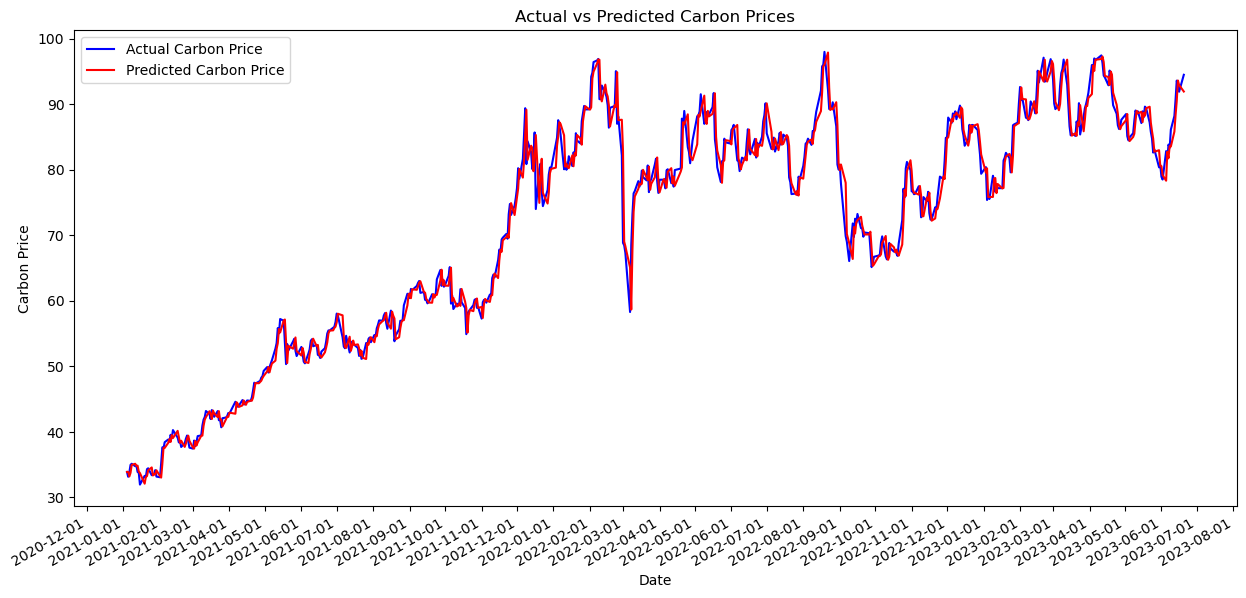

In [39]:
dates = df_arima['Date']
date_train = dates[train_indices]

plt.figure(figsize=(15, 7))
plt.plot(date_train, y_train, label='Actual Carbon Price', color='blue')
plt.plot(date_train, y_train_pred_a, label='Predicted Carbon Price', color='red')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()  # Auto-format for date rotation and readability
plt.title('Actual vs Predicted Carbon Prices')
plt.xlabel('Date')
plt.ylabel('Carbon Price')
plt.legend()
plt.show()

### Out of Sample

In [40]:
# Perform out-of-sample test with daily actual data updates
y_test_pred_a = []  # Store predictions
history = y_train.tolist()  # Initialize with training data

# Loop through test set to predict each day and update with actual data
for t in range(len(y_test)):
    a_test_model = ARIMA(history, order=(1,1,1))
    a_test_model_fit = a_test_model.fit()
    
    # Predict the next value
    forecast = a_test_model_fit.forecast()
    y_test_pred_a.append(forecast[0])
    
    # Update history with actual data for next iteration
    history.append(y_test.iloc[t])

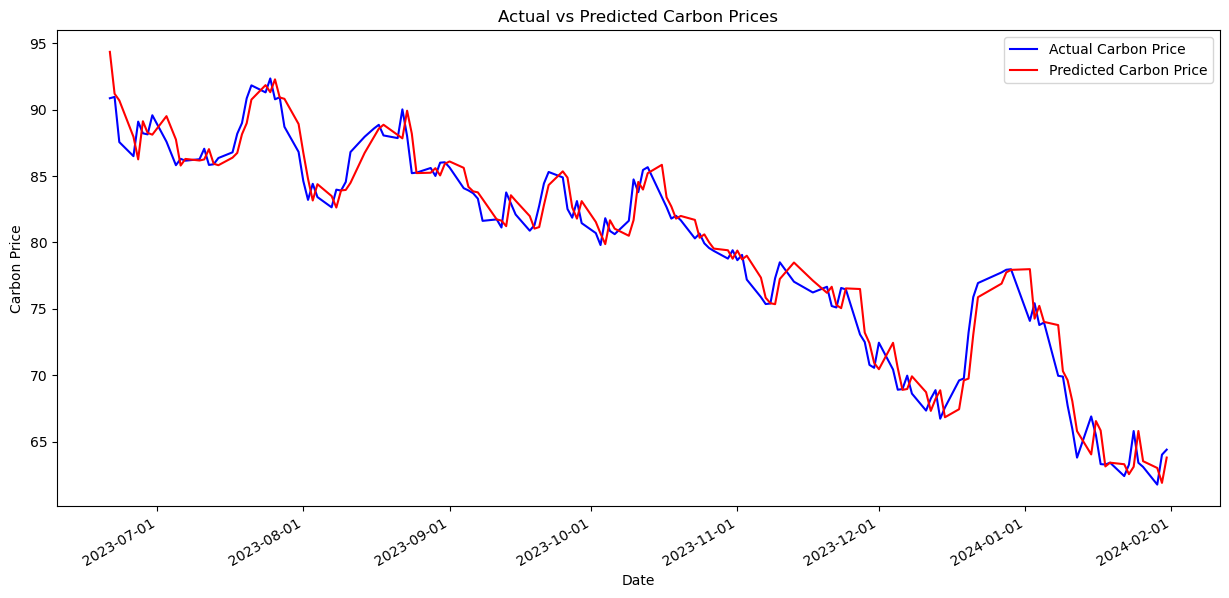

In [41]:
dates = df_arima['Date']
date_test = dates[test_indices]

plt.figure(figsize=(15, 7))
plt.plot(date_test, y_test, label='Actual Carbon Price', color='blue')
plt.plot(date_test, y_test_pred_a, label='Predicted Carbon Price', color='red')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()  # Auto-format for date rotation and readability
plt.title('Actual vs Predicted Carbon Prices')
plt.xlabel('Date')
plt.ylabel('Carbon Price')
plt.legend()
plt.show()

In [42]:
# Ensure y_test_pred_a is a NumPy array before reshaping
y_test_pred_a = np.array(y_test_pred_a)

# Reshape the test set values and predictions into the required format
y_test_reshaped_a = y_test.values.reshape(-1, 1)  # or y_test.to_numpy().reshape(-1, 1)
y_test_pred_reshaped_a = y_test_pred_a.reshape(-1, 1)

# Initialize and fit the linear regression model
reg = linear_model.LinearRegression()
reg.fit(y_test_pred_reshaped_a, y_test_reshaped_a)

# Calculate R-squared on the test data
r_squared_a_test = reg.score(y_test_pred_reshaped_a, y_test_reshaped_a)
r_squared_a_test


0.9669009386886934

In [43]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_a))
print(f"Out-of-Sample RMSE: {rmse}")

# Calculate MSE
mse = mean_squared_error(y_test, y_test_pred_a)
print(f"Out-of-Sample MSE: {mse}")

# Calculate MAE
mae = mean_absolute_error(y_test, y_test_pred_a)
print(f"Out-of-Sample MAE: {mae}")

# Calculate MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test - y_test_pred_a) / y_test)) * 100
print(f"Out-of-Sample MAPE: {mape}%") 

Out-of-Sample RMSE: 1.4724394392910662
Out-of-Sample MSE: 2.1680779023797894
Out-of-Sample MAE: 1.1658466503933282
Out-of-Sample MAPE: 1.4968705734676724%


## ARIMAX Model

In [44]:
X = df_arima.drop(['Date', 'Carbon'], axis=1)
y = df_arima['Carbon']

In [45]:
train_size = int(len(df_arima) * 0.8)
train_indices = df_arima.index[:train_size]
test_indices = df_arima.index[train_size:]

y_train, y_test = y.loc[train_indices], y.loc[test_indices]
X_train, X_test = X.loc[train_indices], X.loc[test_indices]

### In Sample

In [46]:
arima_model = ARIMA(y_train, exog=X_train, order=(1,1,1))
arima_model_fit = arima_model.fit()

print(arima_model_fit.summary())

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Carbon   No. Observations:                  610
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1307.670
Date:                Tue, 15 Oct 2024   AIC                           2641.339
Time:                        16:53:18   BIC                           2698.693
Sample:                             0   HQIC                          2663.651
                                - 610                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Fit_for_55            0.7675     25.756      0.030      0.976     -49.714      51.249
Law                  -3.0552     10.138     -0.301      0.763     -22.926      16.815
Compromise            2.

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [47]:
y_train_pred_arima = arima_model_fit.predict(in_sample=True, exog=X_train, return_conf_int=False)

In [48]:
y_train_pred_arima.iloc[0] = df['Carbon'].iloc[0]

In [49]:
y_train_reshaped_arima = y_train.values.reshape(-1, 1)
y_train_pred_reshaped_arima = y_train_pred_arima.values.reshape(-1, 1)

reg = linear_model.LinearRegression()

reg.fit(y_train_pred_reshaped_arima, y_train_reshaped_arima)

r_squared_arima_train = reg.score(y_train_pred_reshaped_arima, y_train_reshaped_arima)
r_squared_arima_train

0.9862042745801577

In [50]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_arima))
print(f"Out-of-Sample RMSE: {rmse}")

# Calculate MSE
mse = mean_squared_error(y_train, y_train_pred_arima)
print(f"Out-of-Sample MSE: {mse}")

# Calculate MAE
mae = mean_absolute_error(y_train, y_train_pred_arima)
print(f"Out-of-Sample MAE: {mae}")

# Calculate MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_train - y_train_pred_arima) / y_train)) * 100
print(f"Out-of-Sample MAPE: {mape}%") 

Out-of-Sample RMSE: 2.0698144058291437
Out-of-Sample MSE: 4.284131674577851
Out-of-Sample MAE: 1.4950144949130761
Out-of-Sample MAPE: 2.0825556074531963%


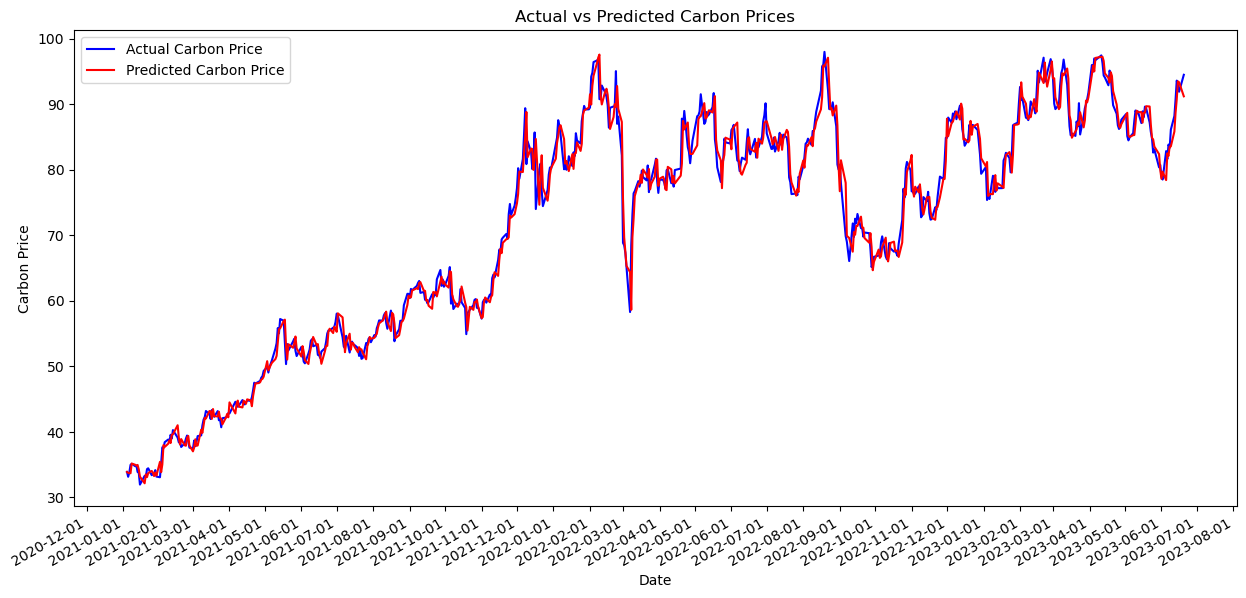

In [51]:
dates = df_arima['Date']
date_train = dates[train_indices]

plt.figure(figsize=(15, 7))
plt.plot(date_train, y_train, label='Actual Carbon Price', color='blue')
plt.plot(date_train, y_train_pred_arima, label='Predicted Carbon Price', color='red')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()  # Auto-format for date rotation and readability
plt.title('Actual vs Predicted Carbon Prices')
plt.xlabel('Date')
plt.ylabel('Carbon Price')
plt.legend()
plt.show()

### Out of Sample

In [52]:
# Perform out-of-sample test with daily actual data updates
y_test_pred_arima = []  # Store predictions
history = y_train.tolist()  # Initialize with training data
exog_history = X_train.values.tolist()

# Loop through test set to predict each day and update with actual data
for t in range(len(y_test)):
    X_input = X_test.iloc[t].values.reshape(1, -1)  # Exogenous variables for day t
    arima_test_model = ARIMA(history, exog=exog_history, order=(1,1,1))
    arima_test_model_fit = arima_test_model.fit()
    
    # Predict the next value
    forecast = arima_test_model_fit.forecast(exog=X_input)
    y_test_pred_arima.append(forecast[0])
    
    # Update history with actual data for next iteration
    history.append(y_test.iloc[t])
    exog_history.append(X_input[0])

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Eri

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Eri

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Eri

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Eri

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Eri

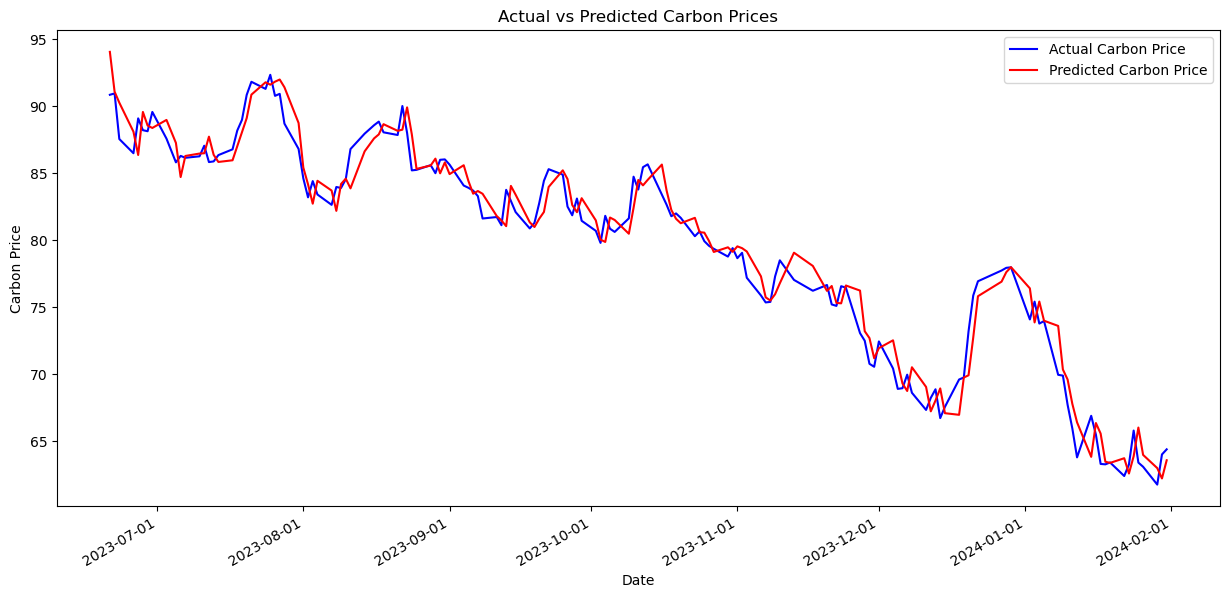

In [53]:
dates = df_arima['Date']
date_test = dates[test_indices]

plt.figure(figsize=(15, 7))
plt.plot(date_test, y_test, label='Actual Carbon Price', color='blue')
plt.plot(date_test, y_test_pred_arima, label='Predicted Carbon Price', color='red')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()  # Auto-format for date rotation and readability
plt.title('Actual vs Predicted Carbon Prices')
plt.xlabel('Date')
plt.ylabel('Carbon Price')
plt.legend()
plt.show()

In [54]:
residuals = y_test - y_test_pred_arima

# Perform White test
exog = np.column_stack([X_test, X_test**2])  # Include the original exogenous variables and their squares
white_test = het_white(residuals, exog)

# Extract test results
white_stat, white_p_val, _, _ = white_test

print(f"White test statistic: {white_stat}")
print(f"p-value of the White test: {white_p_val}")

White test statistic: 123.1441494173028
p-value of the White test: 0.1674956640727138


In [55]:
y_test_pred_arima = np.array(y_test_pred_arima)
y_test_reshaped_arima = y_test.values.reshape(-1, 1)
y_test_pred_reshaped_arima = y_test_pred_arima.reshape(-1, 1)

reg = linear_model.LinearRegression()

reg.fit(y_test_pred_reshaped_arima, y_test_reshaped_arima)

r_squared_arima_test = reg.score(y_test_pred_reshaped_arima, y_test_reshaped_arima)
r_squared_arima_test

0.9674457244911

In [56]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_arima))
print(f"Out-of-Sample RMSE: {rmse}")

# Calculate MSE
mse = mean_squared_error(y_test, y_test_pred_arima)
print(f"Out-of-Sample MSE: {mse}")

# Calculate MAE
mae = mean_absolute_error(y_test, y_test_pred_arima)
print(f"Out-of-Sample MAE: {mae}")

# Calculate MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test - y_test_pred_arima) / y_test)) * 100
print(f"Out-of-Sample MAPE: {mape}%") 

Out-of-Sample RMSE: 1.4579236480307982
Out-of-Sample MSE: 2.125541363487431
Out-of-Sample MAE: 1.1875633390282696
Out-of-Sample MAPE: 1.525316249422381%


## Random Forest

In [57]:
X = df.drop(['Date', 'Carbon'], axis=1)
y = df['Carbon']

In [58]:
train_size = int(len(df_arima) * 0.8)
train_indices = df.index[:train_size]
test_indices = df.index[train_size:]

y_train, y_test = y.loc[train_indices], y.loc[test_indices]
X_train, X_test = X.loc[train_indices], X.loc[test_indices]

In [59]:
seed_value = 42
np.random.seed(seed_value)
random.seed(seed_value)
rf = RandomForestRegressor(random_state=seed_value)

param_grid = {
    'n_estimators': [25, 50, 100, 150, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

tscv = TimeSeriesSplit(n_splits=5)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_

In [60]:
# Use the best estimator from GridSearchCV
best_rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=150, random_state=42)

### Without Difference - In Sample

In [61]:
y_train_pred_rf = best_rf_model.predict(X_train)

# Reshape the data for sklearn (linear regression expects 2D arrays)
y_train_pred_rf_reshaped = y_train_pred_rf.reshape(-1, 1)
y_train_reshaped = y_train.values.reshape(-1, 1)  # Convert to array and reshape if needed

# Initialize the Linear Regression model
reg = linear_model.LinearRegression()

# Fit the linear regression model on the predicted and actual values
reg.fit(y_train_pred_rf_reshaped, y_train_reshaped)

# Calculate the R-squared value
r_squared = r2_score(y_train_reshaped, y_train_pred_rf_reshaped)
print("R-squared value:", r_squared)

R-squared value: 0.9907864766052338


In [62]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
print(f"Out-of-Sample RMSE: {rmse}")

# Calculate MSE
mse = mean_squared_error(y_train, y_train_pred_rf)
print(f"Out-of-Sample MSE: {mse}")

# Calculate MAE
mae = mean_absolute_error(y_train, y_train_pred_rf)
print(f"Out-of-Sample MAE: {mae}")

# Calculate MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_train - y_train_pred_rf) / y_train)) * 100
print(f"Out-of-Sample MAPE: {mape}%")

Out-of-Sample RMSE: 1.6867798796862714
Out-of-Sample MSE: 2.8452263625144325
Out-of-Sample MAE: 1.1701709198483345
Out-of-Sample MAPE: 1.5816588136102854%


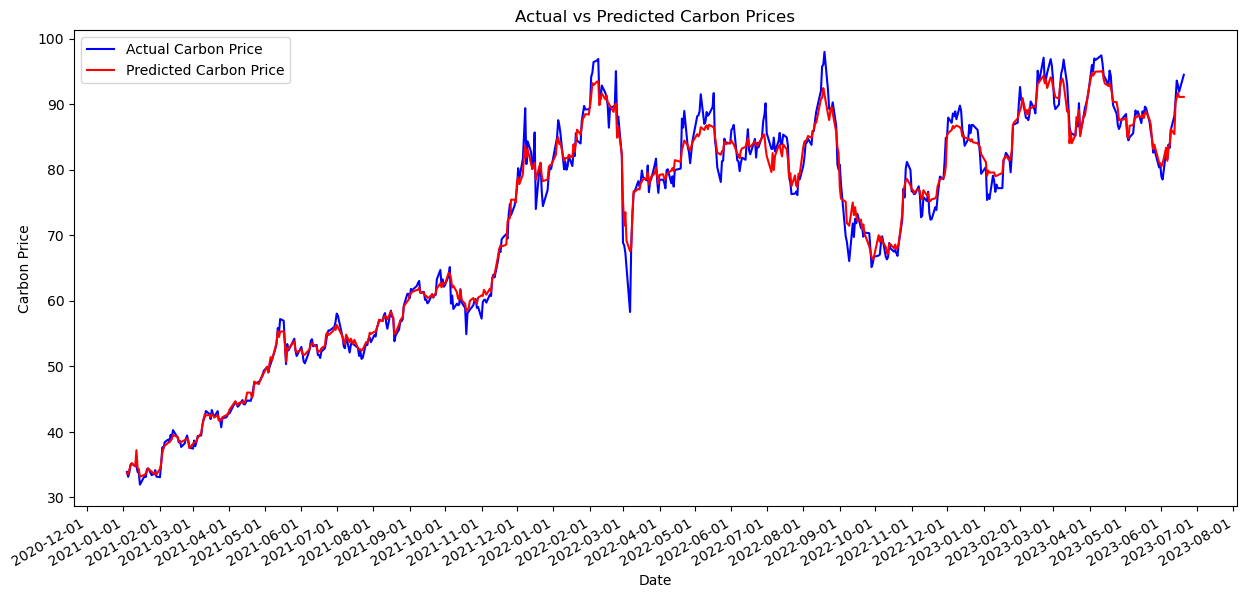

In [63]:
dates = df['Date']
date_train = dates[train_indices]

plt.figure(figsize=(15, 7))
plt.plot(date_train, y_train, label='Actual Carbon Price', color='blue')
plt.plot(date_train, y_train_pred_rf, label='Predicted Carbon Price', color='red')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()  # Auto-format for date rotation and readability
plt.title('Actual vs Predicted Carbon Prices')
plt.xlabel('Date')
plt.ylabel('Carbon Price')
plt.legend()
plt.show()

### Without Difference - Out of Sample

In [64]:
# Define TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)  # 5 splits for example, adjust based on your data

In [65]:
# Initialize the RandomForestRegressor with your chosen hyperparameters
rf_model = best_rf_model

# Perform cross-validation
cv_results = cross_val_score(rf_model, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')

# Convert negative MSE to positive RMSE
rmse_cv = np.sqrt(-cv_results)

# Output the cross-validation results
print("Time-Series Cross-Validation RMSE for each fold:", rmse_cv)
print("Average RMSE across folds:", np.mean(rmse_cv))

Time-Series Cross-Validation RMSE for each fold: [ 8.13658947 22.81910416 11.89599407  9.27027592 18.50909597]
Average RMSE across folds: 14.126211918002705


In [66]:
# Store predictions
history_X_rf = X_train.values.tolist()  # Start with the exogenous variables (training set)
history_y_rf = y_train.tolist()  # Start with the target values (training set)
y_test_pred_rf = []

# Loop through the test set, predicting day by day, and updating the history
for t in range(len(y_test)):
    # Get the exogenous input for day t
    X_input = X_test.iloc[t].values.reshape(1, -1)
    
    # Train a new Random Forest model on the current history
    rf_test_model = RandomForestRegressor(
        max_depth=best_rf_model.max_depth,
        max_features=best_rf_model.max_features,
        min_samples_leaf=best_rf_model.min_samples_leaf,
        min_samples_split=best_rf_model.min_samples_split,
        n_estimators=best_rf_model.n_estimators,
        random_state=42
    )
    rf_test_model.fit(np.array(history_X_rf), np.array(history_y_rf))
    
    # Predict the next value (carbon price for day t)
    forecast = rf_test_model.predict(X_input)
    y_test_pred_rf.append(forecast[0])  # Store the prediction
    
    # Update history with the actual test data for the next iteration
    history_y_rf.append(y_test.iloc[t])  # Append the actual value for day t
    history_X_rf.append(X_input[0])  # Append the exogenous variables for day 

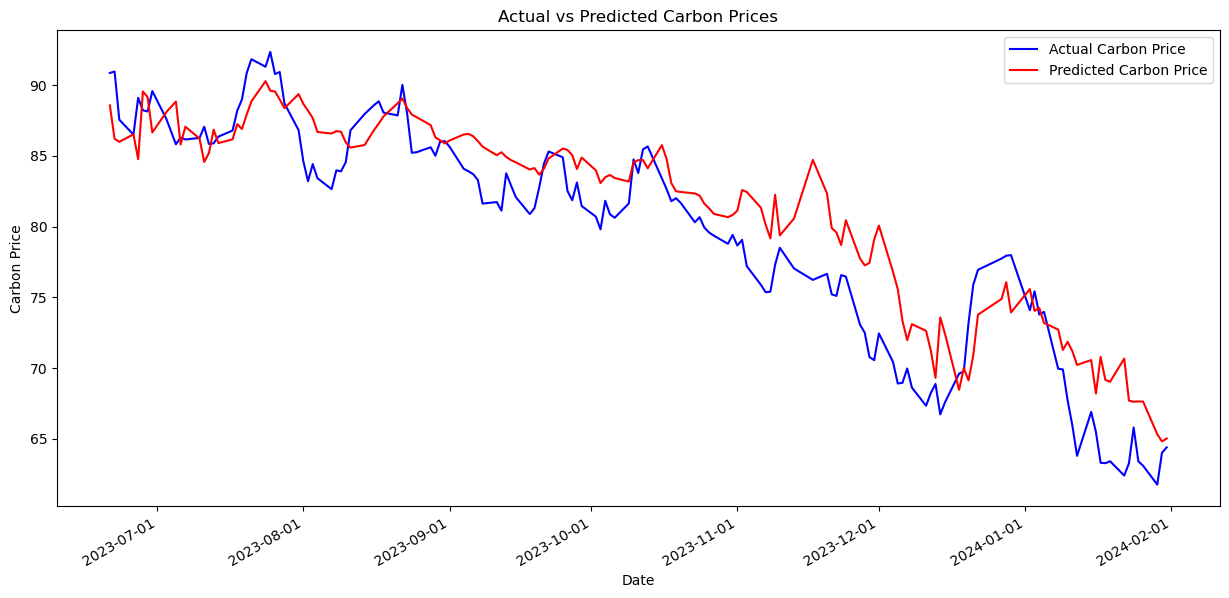

In [67]:
dates = df['Date']
date_test = dates[test_indices]

plt.figure(figsize=(15, 7))
plt.plot(date_test, y_test, label='Actual Carbon Price', color='blue')
plt.plot(date_test, y_test_pred_rf, label='Predicted Carbon Price', color='red')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()  # Auto-format for date rotation and readability
plt.title('Actual vs Predicted Carbon Prices')
plt.xlabel('Date')
plt.ylabel('Carbon Price')
plt.legend()
plt.show()

In [68]:
y_test_pred_rf = np.array(y_test_pred_rf)
# Reshape the data for sklearn (linear regression expects 2D arrays)
y_test_pred_rf_reshaped = y_test_pred_rf.reshape(-1, 1)
y_test_reshaped = y_test.values.reshape(-1, 1)  # Convert to array and reshape if needed

# Initialize the Linear Regression model
reg = linear_model.LinearRegression()

# Fit the linear regression model on the predicted and actual values
reg.fit(y_test_pred_rf_reshaped, y_test_reshaped)

# Calculate the R-squared value
r_squared = r2_score(y_test_reshaped, y_test_pred_rf_reshaped)
print("R-squared value:", r_squared)

R-squared value: 0.8258174444888462


In [69]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
print(f"Out-of-Sample RMSE: {rmse}")

# Calculate MSE
mse = mean_squared_error(y_test, y_test_pred_rf)
print(f"Out-of-Sample MSE: {mse}")

# Calculate MAE
mae = mean_absolute_error(y_test, y_test_pred_rf)
print(f"Out-of-Sample MAE: {mae}")

# Calculate MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test - y_test_pred_rf) / y_test)) * 100
print(f"Out-of-Sample MAPE: {mape}%")

Out-of-Sample RMSE: 3.333326247427527
Out-of-Sample MSE: 11.111063871789279
Out-of-Sample MAE: 2.7175130959595504
Out-of-Sample MAPE: 3.597134752101985%


### With Difference - In Sample

In [70]:
seed_value = 42
np.random.seed(seed_value)
random.seed(seed_value)



# First, difference the target variable
y_diff = y.diff().dropna()  # First difference of the carbon price to make it stationary

# Split the differenced dataset
train_size_diff = int(len(y_diff) * 0.8)
train_indices_diff = y_diff.index[:train_size_diff]
test_indices_diff = y_diff.index[train_size_diff:]

# Create train-test splits for the differenced data
y_train_diff, y_test_diff = y_diff.loc[train_indices_diff], y_diff.loc[test_indices_diff]
X_train_diff, X_test_diff = X.loc[train_indices_diff], X.loc[test_indices_diff]

In [71]:
param_grid = {
    'n_estimators': [25, 50, 100, 150, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_diff, y_train_diff)
best_rf_model = grid_search.best_estimator_

In [72]:
best_rf_model.fit(X_train_diff, y_train_diff)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=4,
                      n_estimators=200, random_state=42)

In [75]:
# Predict on the training set
y_train_pred_diff = best_rf_model.predict(X_train_diff)

# Invert the differencing to recover original scale
y_train_pred_diff = np.insert(y_train_pred_diff, 0, 0)

# Now calculate the inverted values
y_train_pred = [x + y for x, y in zip(y_train[:-1], y_train_pred_diff)]

# Optionally convert back to numpy array
y_train_pred = np.array(y_train_pred)

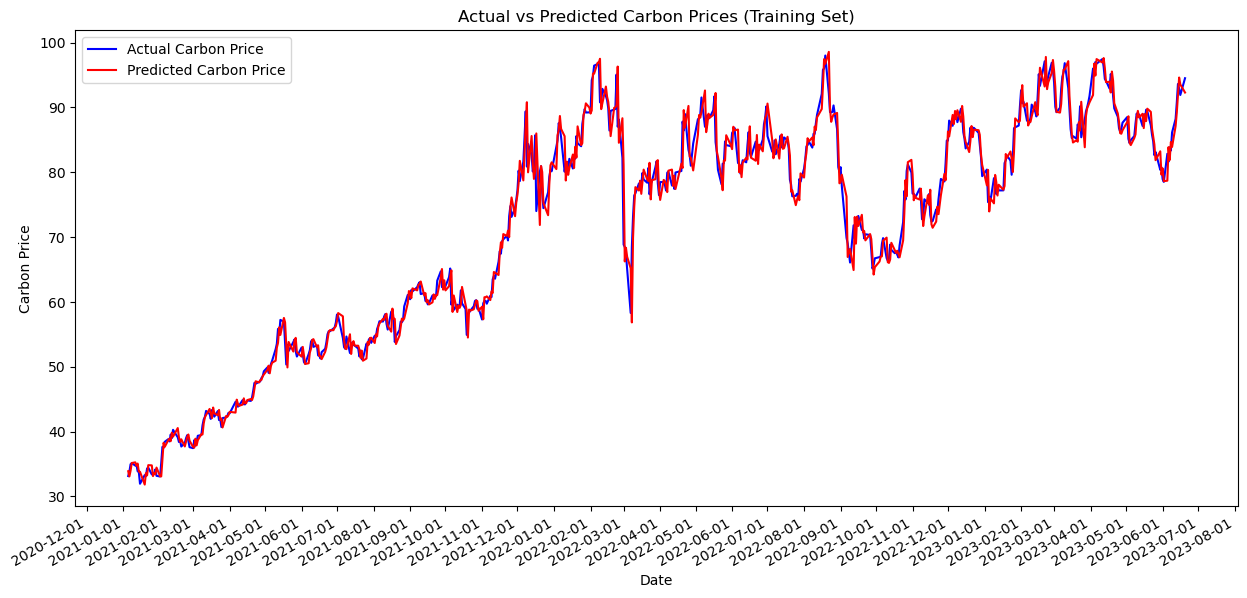

In [76]:
date_train = df['Date'][train_indices_diff]

plt.figure(figsize=(15, 7))
plt.plot(date_train, y_train[train_indices_diff], label='Actual Carbon Price', color='blue')
plt.plot(date_train, y_train_pred, label='Predicted Carbon Price', color='red')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()
plt.title('Actual vs Predicted Carbon Prices (Training Set)')
plt.xlabel('Date')
plt.ylabel('Carbon Price')
plt.legend()
plt.show()

In [77]:
# Evaluate model performance on training set
r_squared_train = r2_score(y_train.loc[train_indices_diff], y_train_pred)
print("In-Sample R-squared:", r_squared_train)

rmse_train = np.sqrt(mean_squared_error(y_train.loc[train_indices_diff], y_train_pred))
print(f"In-Sample RMSE: {rmse_train}")

mse_train = mean_squared_error(y_train.loc[train_indices_diff], y_train_pred)
print(f"In-Sample MSE: {mse_train}")

mae_train = mean_absolute_error(y_train.loc[train_indices_diff], y_train_pred)
print(f"In-Sample MAE: {mae_train}")

mape_train = np.mean(np.abs((y_train.loc[train_indices_diff] - y_train_pred) / y_train.loc[train_indices_diff])) * 100
print(f"In-Sample MAPE: {mape_train}%")

In-Sample R-squared: 0.9839366615412601
In-Sample RMSE: 2.2207176037409613
In-Sample MSE: 4.931586675564996
In-Sample MAE: 1.5640583371565882
In-Sample MAPE: 2.1731396254115984%


### With Difference - Out of Sample

In [78]:
# Store initial values from the training set to use for rolling prediction
history_X_rf = X_train_diff.values.tolist()  # Exogenous variables (training set)
history_y_rf = y_train_diff.tolist()  # Differenced target values (training set)

# Start with the last value from the original (non-differenced) training data
last_train_value = y.loc[train_indices_diff[-1]]  # Last value of the training set

y_test_pred_rf = []  # Store differenced predictions

y_test_pred = []

# Loop through the test set, predicting day by day
for t in range(len(y_test_diff)):
    X_input = X_test_diff.iloc[t].values.reshape(1, -1)

    # Train a new Random Forest model on the current history
    rf_test_model = RandomForestRegressor(
        max_depth=best_rf_model.max_depth,
        max_features=best_rf_model.max_features,
        min_samples_leaf=best_rf_model.min_samples_leaf,
        min_samples_split=best_rf_model.min_samples_split,
        n_estimators=best_rf_model.n_estimators,
        random_state=42
    )
    rf_test_model.fit(np.array(history_X_rf), np.array(history_y_rf))

    # Predict the next difference
    forecast_diff = rf_test_model.predict(X_input)
    y_test_pred_rf.append(forecast_diff[0])  # Store the differenced prediction
    
    # Convert the differenced prediction back to the original scale
    if t == 0:
        y_test_pred.append(y_train.iloc[-1]+forecast_diff[0])
    else:
        # Subsequent predictions: add the difference to the last predicted value
        y_test_pred.append(y_test.iloc[t-1]+forecast_diff[0])

    # Update history for the next iteration
    history_y_rf.append(y_test_diff.iloc[t])  # Add actual differenced value
    history_X_rf.append(X_input[0])  # Add exogenous variables

# Convert y_test_pred to a NumPy array for further analysis
y_test_pred = np.array(y_test_pred)

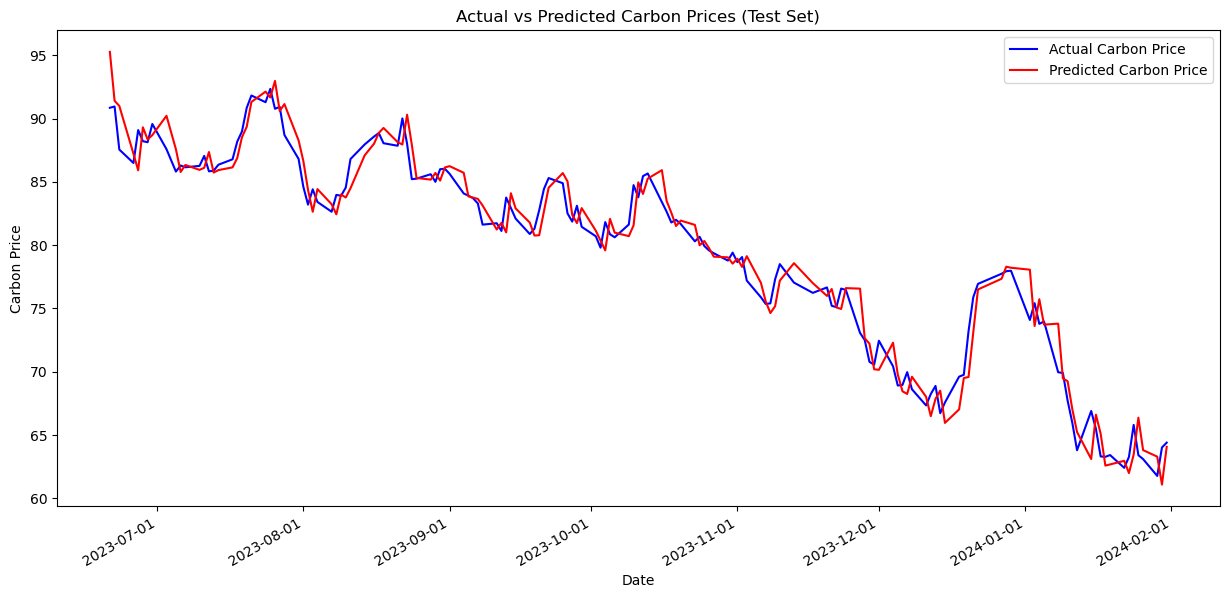

In [79]:
# Plot the actual vs predicted values
date_test = df['Date'][test_indices_diff]

plt.figure(figsize=(15, 7))
plt.plot(date_test, y_test, label='Actual Carbon Price', color='blue')
plt.plot(date_test, y_test_pred, label='Predicted Carbon Price', color='red')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()
plt.title('Actual vs Predicted Carbon Prices (Test Set)')
plt.xlabel('Date')
plt.ylabel('Carbon Price')
plt.legend()
plt.show()

In [80]:
# Evaluation on Test Set
r_squared_test = r2_score(y_test, y_test_pred)
print("Out-of-Sample R-squared:", r_squared_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"Out-of-Sample RMSE: {rmse_test}")

mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Out-of-Sample MSE: {mse_test}")

mae_test = mean_absolute_error(y_test, y_test_pred)
print(f"Out-of-Sample MAE: {mae_test}")

mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
print(f"Out-of-Sample MAPE: {mape_test}%")

Out-of-Sample R-squared: 0.9628006237949805
Out-of-Sample RMSE: 1.5404348017397793
Out-of-Sample MSE: 2.3729393784110733
Out-of-Sample MAE: 1.209694941370652
Out-of-Sample MAPE: 1.5547120229456803%


### LSTM Model

In [124]:
# Set seed for reproducibility
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

# Normalize features
scaler_features = MinMaxScaler(feature_range=(0, 1))
scaler_target = MinMaxScaler(feature_range=(0, 1))

# Assuming 'features' and 'target' are defined in your dataframe 'df'
features = df.drop(['Date', 'Carbon'], axis=1)
target = df['Carbon']

In [125]:
# Scale the features and target
features_scaled = scaler_features.fit_transform(features)
target_scaled = scaler_target.fit_transform(target.values.reshape(-1, 1))

In [126]:
# Split data into training and testing sets (80% training, 20% testing)
train_size = int(len(features_scaled) * 0.8)
X_train, X_test = features_scaled[:train_size], features_scaled[train_size:]
y_train, y_test = target_scaled[:train_size], target_scaled[train_size:]

In [127]:
# Function to create sequences of past data
def create_sequences(X, y, time_steps):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])  # Sequence of time steps for features
        ys.append(y[i + time_steps])  # Target value after the sequence
    return np.array(Xs), np.array(ys)

In [128]:
# Define the look-back period (e.g., using 5 time steps)
time_steps = 1

# Create sequences for training and testing
X_train_seq, y_train_seq = create_sequences(X_train, y_train, time_steps)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, time_steps)

#### Find Best Parameters

In [129]:
# Define a function to create the LSTM model
def create_model(optimizer='rmsprop'):
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]), return_sequences=True))
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

In [130]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
model = KerasRegressor(build_fn=create_model, verbose=1)

In [131]:
# Define the hyperparameter space for RandomizedSearchCV
param_grid = {
    'batch_size': [1, 2, 3, 4, 5],
    'epochs': [10, 50, 100],
    'optimizer': ['sgd', 'rmsprop', 'adam', 'nadam']
}

# Perform RandomizedSearchCV to find the best parameters
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs=-1, cv=3, scoring='neg_mean_squared_error', random_state=seed_value)
random_search_result = random_search.fit(X_train_seq, y_train_seq)

# Output the best parameters and results
best_params = random_search_result.best_params_
print("Best Score: %f using %s" % (random_search_result.best_score_, random_search_result.best_params_))

Epoch 1/50
609/609 [==============================] - 2s 3ms/step - loss: 0.0318
Epoch 2/50
609/609 [==============================] - 2s 3ms/step - loss: 0.0152
Epoch 3/50
609/609 [==============================] - 2s 3ms/step - loss: 0.0121
Epoch 4/50
609/609 [==============================] - 2s 3ms/step - loss: 0.0112
Epoch 5/50
609/609 [==============================] - 2s 3ms/step - loss: 0.0096
Epoch 6/50
609/609 [==============================] - 2s 3ms/step - loss: 0.0090
Epoch 7/50
609/609 [==============================] - 2s 3ms/step - loss: 0.0083
Epoch 8/50
609/609 [==============================] - 2s 3ms/step - loss: 0.0077
Epoch 9/50
609/609 [==============================] - 2s 3ms/step - loss: 0.0075
Epoch 10/50
609/609 [==============================] - 2s 3ms/step - loss: 0.0067
Epoch 11/50
609/609 [==============================] - 2s 3ms/step - loss: 0.0072
Epoch 12/50
609/609 [==============================] - 2s 3ms/step - loss: 0.0067
Epoch 13/50
609/609 [====

#### In Sample Performance

In [132]:
# Train the final model with the best parameters
best_model = create_model(optimizer=best_params['optimizer'])
best_model.fit(X_train_seq, y_train_seq, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=1)

Epoch 1/50
609/609 [==============================] - 2s 3ms/step - loss: 0.0301
Epoch 2/50
609/609 [==============================] - 2s 3ms/step - loss: 0.0148
Epoch 3/50
609/609 [==============================] - 2s 3ms/step - loss: 0.0120
Epoch 4/50
609/609 [==============================] - 2s 3ms/step - loss: 0.0112
Epoch 5/50
609/609 [==============================] - 2s 3ms/step - loss: 0.0097
Epoch 6/50
609/609 [==============================] - 2s 3ms/step - loss: 0.0090
Epoch 7/50
609/609 [==============================] - 2s 3ms/step - loss: 0.0084
Epoch 8/50
609/609 [==============================] - 2s 3ms/step - loss: 0.0076
Epoch 9/50
609/609 [==============================] - 2s 3ms/step - loss: 0.0075
Epoch 10/50
609/609 [==============================] - 2s 3ms/step - loss: 0.0067
Epoch 11/50
609/609 [==============================] - 2s 3ms/step - loss: 0.0071
Epoch 12/50
609/609 [==============================] - 2s 3ms/step - loss: 0.0067
Epoch 13/50
609/609 [====

In [133]:
# In-sample performance
y_train_pred_lstm = best_model.predict(X_train_seq)

# Inverse transform predictions and actual values to original scale
y_train_pred_lstm = scaler_target.inverse_transform(y_train_pred_lstm)
y_train_original = scaler_target.inverse_transform(y_train_seq)

# Calculate R-squared for the in-sample training data
r_squared_train = r2_score(y_train_original, y_train_pred_lstm)
print("In-Sample R-squared value:", r_squared_train)

In-Sample R-squared value: 0.95005767424556


In [134]:
# Calculate RMSE, MSE, MAE, MAPE
rmse = np.sqrt(mean_squared_error(y_train_original, y_train_pred_lstm))
mse = mean_squared_error(y_train_original, y_train_pred_lstm)
mae = mean_absolute_error(y_train_original, y_train_pred_lstm)
mape = np.mean(np.abs((y_train_original - y_train_pred_lstm) / y_train_original)) * 100
print(f"In-Sample RMSE: {rmse}")
print(f"In-Sample MSE: {mse}")
print(f"In-Sample MAE: {mae}")
print(f"In-Sample MAPE: {mape}%")

In-Sample RMSE: 3.9157036121256024
In-Sample MSE: 15.332734778013489
In-Sample MAE: 2.926643281632848
In-Sample MAPE: 4.0427717452457275%


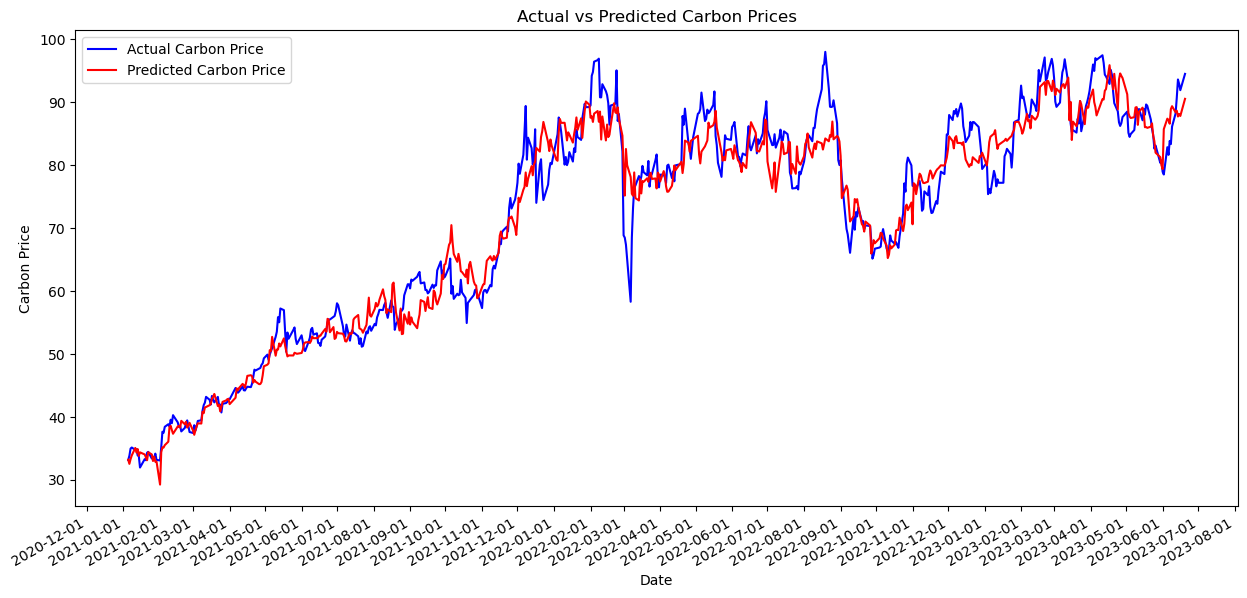

In [135]:
dates = df['Date']
date_train = dates[train_indices]

plt.figure(figsize=(15, 7))
plt.plot(date_train[time_steps:], y_train_original, label='Actual Carbon Price', color='blue')
plt.plot(date_train[time_steps:], y_train_pred_lstm, label='Predicted Carbon Price', color='red')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()  # Auto-format for date rotation and readability
plt.title('Actual vs Predicted Carbon Prices')
plt.xlabel('Date')
plt.ylabel('Carbon Price')
plt.legend()
plt.show()

#### Out of Sample Performance

In [136]:
# Store predictions and actual values
history_X_lstm = X_train_seq.tolist()  # Start with the exogenous variables (training set)
history_y_lstm = y_train_seq.tolist()  # Start with the target values (training set)
y_test_pred_lstm = []

# Get the best parameters from RandomizedSearchCV
best_batch_size = best_params['batch_size']
best_epochs = best_params['epochs']
best_optimizer = 'rmsprop'

# Define the LSTM model using the best parameters
model = Sequential()
model.add(LSTM(50, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]), return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=best_optimizer)

# Train the model on the initial training set
X_initial = np.array(history_X_lstm).reshape(len(history_X_lstm), X_train_seq.shape[1], X_train_seq.shape[2])
y_initial = np.array(history_y_lstm)
model.fit(X_initial, y_initial, epochs=best_epochs, batch_size=best_batch_size, verbose=1)

# Rolling walk-forward prediction for the test set
for t in range(len(X_test_seq)):
    # Get the exogenous input for day t from the test set
    X_input = X_test_seq[t].reshape(1, X_train_seq.shape[1], X_train_seq.shape[2])  # Reshape input for LSTM

    # Predict the next value (e.g., carbon price for day t)
    forecast = model.predict(X_input, batch_size=best_batch_size)
    y_test_pred_lstm.append(forecast[0][0])  # Store the prediction

    # Update history with the actual test data for the next iteration
    history_y_lstm.append(y_test_seq[t])  # Append the actual value for day t
    history_X_lstm.append(X_test_seq[t])  # Append the exogenous variables for day t

    # Update the model with the new data point (continual training)
    X_train_rolling = np.array(history_X_lstm[-best_batch_size:]).reshape(best_batch_size, X_train_seq.shape[1], X_train_seq.shape[2])
    y_train_rolling = np.array(history_y_lstm[-best_batch_size:])
    model.fit(X_train_rolling, y_train_rolling, epochs=1, batch_size=best_batch_size, verbose=0)

Epoch 1/50
609/609 [==============================] - 1s 2ms/step - loss: 0.0325
Epoch 2/50
609/609 [==============================] - 2s 3ms/step - loss: 0.0157
Epoch 3/50
609/609 [==============================] - 2s 3ms/step - loss: 0.0126
Epoch 4/50
609/609 [==============================] - 2s 3ms/step - loss: 0.0118
Epoch 5/50
609/609 [==============================] - 2s 3ms/step - loss: 0.0102
Epoch 6/50
609/609 [==============================] - 2s 3ms/step - loss: 0.0095
Epoch 7/50
609/609 [==============================] - 2s 3ms/step - loss: 0.0089
Epoch 8/50
609/609 [==============================] - 2s 3ms/step - loss: 0.0081
Epoch 9/50
609/609 [==============================] - 2s 3ms/step - loss: 0.0080
Epoch 10/50
609/609 [==============================] - 2s 3ms/step - loss: 0.0073
Epoch 11/50
609/609 [==============================] - 2s 3ms/step - loss: 0.0076
Epoch 12/50
609/609 [==============================] - 2s 3ms/step - loss: 0.0072
Epoch 13/50
609/609 [====

In [137]:
# Inverse transform predictions and actual values to original scale
y_test_pred_lstm = scaler_target.inverse_transform(np.array(y_test_pred_lstm).reshape(-1, 1))
y_test_actual = scaler_target.inverse_transform(np.array(y_test_seq).reshape(-1, 1))

In [138]:
# Calculate R-squared for out-of-sample test data
r_squared_test = r2_score(y_test_actual, y_test_pred_lstm)
print("Out-of-Sample R-squared value:", r_squared_test)

Out-of-Sample R-squared value: 0.9443385968769711


In [139]:
# Calculate RMSE for out-of-sample test data
rmse_test = np.sqrt(mean_squared_error(y_test_actual, y_test_pred_lstm))
print(f"Out-of-Sample RMSE: {rmse_test}")

# Calculate MSE for out-of-sample test data
mse_test = mean_squared_error(y_test_actual, y_test_pred_lstm)
print(f"Out-of-Sample MSE: {mse_test}")

# Calculate MAE for out-of-sample test data
mae_test = mean_absolute_error(y_test_actual, y_test_pred_lstm)
print(f"Out-of-Sample MAE: {mae_test}")

# Calculate MAPE for out-of-sample test data
mape_test = np.mean(np.abs((y_test_actual - y_test_pred_lstm) / y_test_actual)) * 100
print(f"Out-of-Sample MAPE: {mape_test}%")

Out-of-Sample RMSE: 1.877879417860659
Out-of-Sample MSE: 3.526431108024688
Out-of-Sample MAE: 1.400457333012631
Out-of-Sample MAPE: 1.7816306275369744%


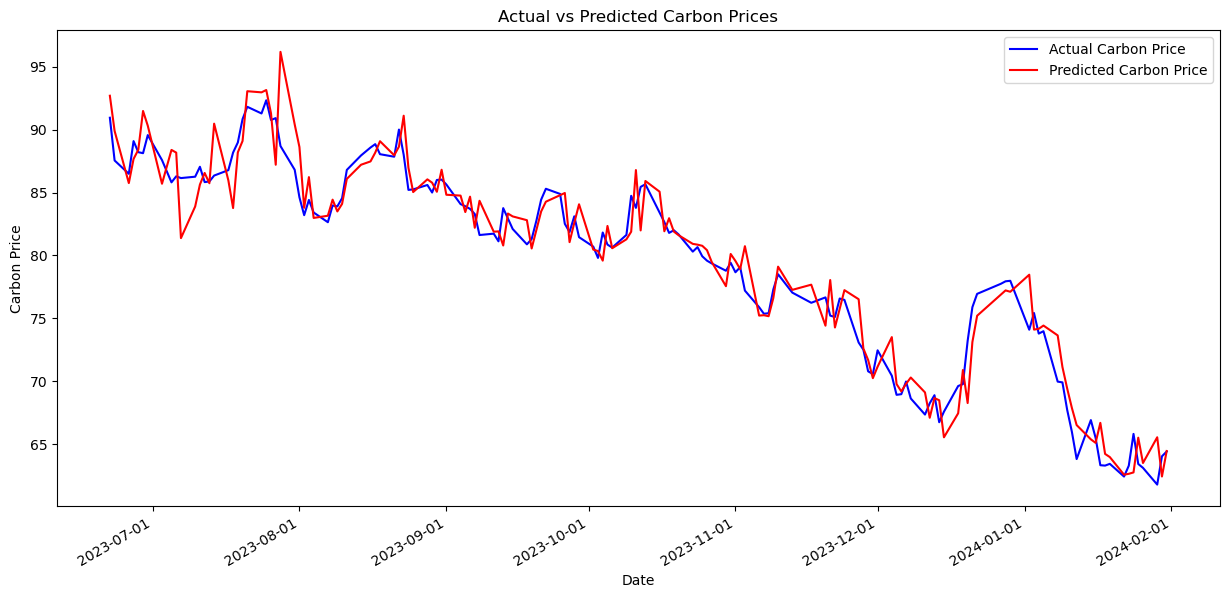

In [141]:
# Adjust the test indices range and ensure shapes match
date_test = dates[train_size + time_steps:train_size + time_steps + len(y_test_actual)]

# Flatten the arrays for plotting
y_test_actual_flat = y_test_actual.flatten()
y_test_pred_lstm_flat = y_test_pred_lstm.flatten()

# Plotting the predictions vs actual values
plt.figure(figsize=(15, 7))
plt.plot(date_test, y_test_actual_flat, label='Actual Carbon Price', color='blue')
plt.plot(date_test, y_test_pred_lstm_flat, label='Predicted Carbon Price', color='red')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()  # Auto-format for date rotation and readability
plt.title('Actual vs Predicted Carbon Prices')
plt.xlabel('Date')
plt.ylabel('Carbon Price')
plt.legend()
plt.show()